# **Providing data-driven suggestions for HR to improve employee retention**

## Business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

## The HR dataset

The dataset contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)|
Work_accident|Whether or not the employee experienced an accident while at work|
left|Whether or not the employee left the company|
promotion_last_5years|Whether or not the employee was promoted in the last 5 years|
Department|The employee's department|
salary|The employee's salary (U.S. dollars)|

## Plan

Stakeholders: 
 - the leadership team at Salifort.

Goal: 
 - to create a model that can predict whether an employee will leave the company.
 
Initial observations:
 - provided columns seem reasonable for prediction of what will cause employee to leave
 - most of the features are types ints or floats. A few are categories that I will need to dummy code.
 
Ethical Considerations: 
 - How will this model be used? Will using this model benefit one group more than another? This could prove problematic if for example only people who are in danger of leaving are offered a promotion.

## Step 1. Imports

### Import packages

In [1]:
#Data manipulation and preprocessing
import numpy as np
import pandas as pd

#Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Modeling
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, RocCurveDisplay
from sklearn.tree import plot_tree

#Storing
import pickle


### Load dataset

In [2]:
# Load dataset into a dataframe
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
df0.head(5)


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

### Gather basic information about the data

In [3]:
# Gather basic information about the data
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [4]:
# Gather descriptive statistics about the data
df0.describe(include = "all")

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999,14999
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sales,low
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4140,7316
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,NaN,NaN
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,NaN,NaN
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,NaN,NaN


### Rename columns

In [5]:
# Display all column names
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [6]:
# Rename columns (shorten, correct spelling, lower case)
df0.rename(columns = {"satisfaction_level": "satisfaction", "last_evaluation": "last_eval",
                      "number_project": "num_proj", "average_montly_hours": "average_monthly_hours", 
                      "time_spend_company": "tenure", "Work_accident": "work_accident", 
                      "promotion_last_5years": "promotion_in_5y", "Department": "department"}, inplace = True)

# Display all column names after the update
df0.columns

Index(['satisfaction', 'last_eval', 'num_proj', 'average_monthly_hours',
       'tenure', 'work_accident', 'left', 'promotion_in_5y', 'department',
       'salary'],
      dtype='object')

### Check missing values

In [7]:
# Check for missing values
df0.isna().sum(axis = 0)

satisfaction             0
last_eval                0
num_proj                 0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_in_5y          0
department               0
salary                   0
dtype: int64

There are no missing values in the dataset.

### Check duplicates

In [8]:
# Check for duplicates
duplicates = df0.duplicated()

In [9]:
# Inspect some rows containing duplicates
df0[duplicates]

,satisfaction,last_eval,num_proj,average_monthly_hours,tenure,work_accident,left,promotion_in_5y,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [10]:
# Drop duplicates and save resulting dataframe in a new variable
df1 = df0.drop_duplicates(keep = "first")

# Display first few rows of new dataframe
df1.head(5)

,satisfaction,last_eval,num_proj,average_monthly_hours,tenure,work_accident,left,promotion_in_5y,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

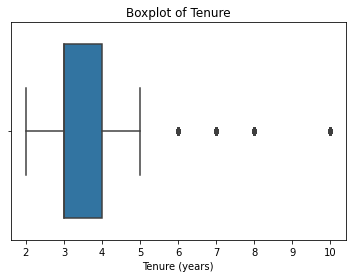

In [11]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
sns.boxplot(df1["tenure"])
plt.title("Boxplot of Tenure")
plt.xlabel("Tenure (years)")
plt.show()

In [12]:
# Determine the number of rows containing outliers
tenure_q1 = df1["tenure"].quantile(0.25)
tenure_q3 = df1["tenure"].quantile(0.75)
tenure_iqr = tenure_q3 - tenure_q1

# Outliers lie above Q3 + 1.5 * IQR or below Q1 -  1.5 * IQR
outliers = df1[(df1["tenure"]> tenure_q3 + 1.5 * tenure_iqr) | (df1["tenure"]< tenure_q1 - 1.5 * tenure_iqr)]
print("Number of rows in data containing outliers in tenure:", outliers.shape[0])

Number of rows in data containing outliers in tenure: 824


Will need to consider whether to remove outliers for certain models that don't handle them well (i.e. Logistic Regression).

## Step 2. Data Exploration (Further EDA and Visualizations)

Percent stayed: 83.396%
Percent left: 16.604%


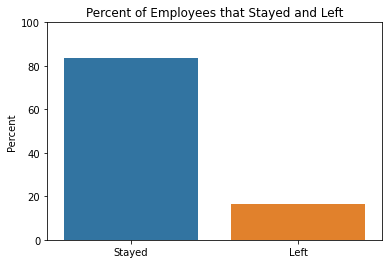

In [25]:
# Get numbers of people who left vs. stayed
left_df = df1["left"].value_counts().to_frame().reset_index()
left_df.columns = ["left", "count"]

# Get percentages of people who left vs. stayed
print("Percent stayed:", str(round(left_df["count"][0]/ left_df["count"].sum()*100, 3)) + "%")
print("Percent left:", str(round(left_df["count"][1]/ left_df["count"].sum() * 100, 3)) + "%")

left_df["percent"] = (left_df["count"]/left_df["count"].sum()) * 100

sns.barplot(x = left_df["left"], y = left_df["percent"])
plt.xlabel("")
plt.ylabel("Percent")
plt.title("Percent of Employees that Stayed and Left")
plt.xticks(left_df["left"], ["Stayed", "Left"])
plt.ylim(0,100)
plt.show()


### Data visualizations

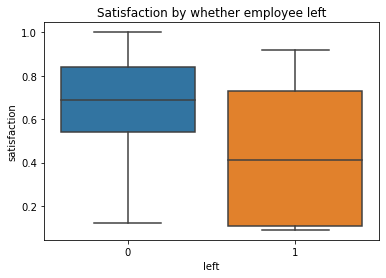

In [14]:
# Are satisfaction and whether employees left correlated?
sns.boxplot(data = df1, x = "left", y = "satisfaction")
plt.title("Satisfaction by whether employee left")
plt.show()

It would make sense that employees who are more satisfied are more likely to stay. This appears to be the case. Also, even though some of the employees that left report relatively high satisfaction rates, it seems that satisfaction varies more for employees who left than those who stayed (this could also be because there are less observations for employees who left).

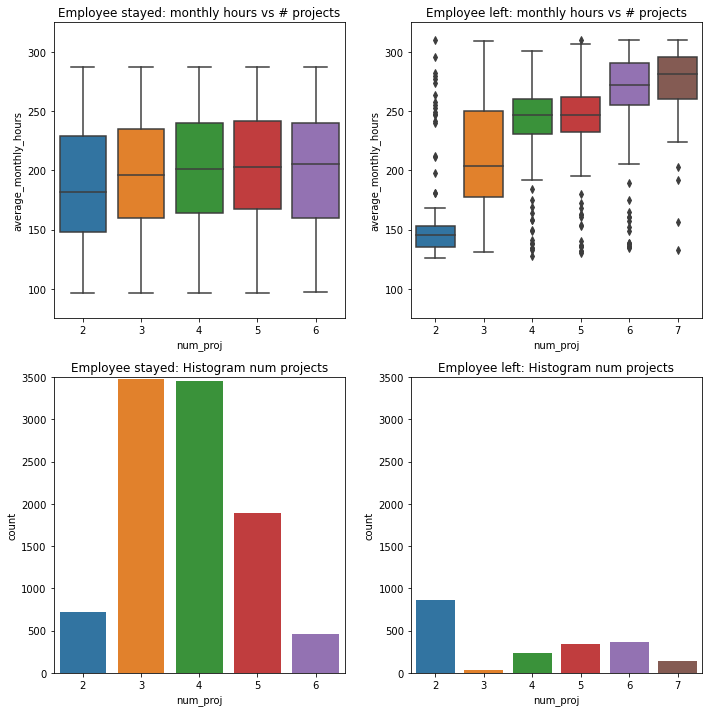

In [15]:
# Are average number of monthly hours and number of projects correlated?
stayed = df1[df1["left"] == 0]
left = df1[df1["left"] == 1]

fig, ax = plt.subplots(2,2, figsize = (10,10))

sns.boxplot(x = stayed["num_proj"], y = stayed["average_monthly_hours"], orient = "v", ax = ax[0, 0])
ax[0, 0].set_title("Employee stayed: monthly hours vs # projects")
ax[0, 0].set_ylim(75, 325)

sns.boxplot(x = left["num_proj"], y = left["average_monthly_hours"], orient = "v", ax = ax[0, 1])
ax[0, 1].set_title("Employee left: monthly hours vs # projects")
ax[0, 1].set_ylim(75, 325)

sns.countplot(x = stayed["num_proj"], ax = ax[1,0])
ax[1, 0].set_title("Employee stayed: Histogram num projects")
ax[1, 0].set_ylim(0, 3500)

sns.countplot(x = left["num_proj"], ax = ax[1,1])
ax[1, 1].set_title("Employee left: Histogram num projects")
ax[1, 1].set_ylim(0, 3500)

plt.tight_layout()
plt.show()



Overall, employees with more projects tended to work more. However, for employees that stayed, this difference was small, but for employees who left, the amount of hours per month increase dramatically as a function of the number of projects they were involved in. 

Looking across both top figures, in employees who worked 2 projects, those who left worked significantly less hours than those who stayed. They might have been fired because they didn't work enough. 

For employees who worked a lot of projects (>=4), those who left worked much more that those who stayed. Those are probably employees that quit. 

Looking across both bottom figures, employees who worked 3-4 projects were most likely to stay. And all the employees who worked on 7 projects quit.

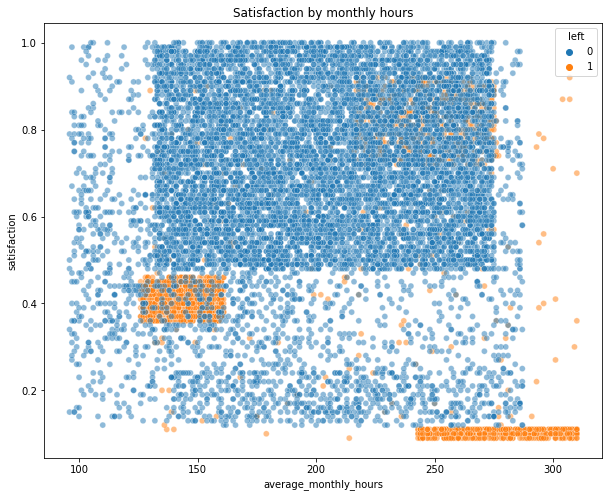

In [16]:
# Satisfaction rate vs monthly hours
plt.figure(figsize = (10,8))
sns.scatterplot(x = df1["average_monthly_hours"], y = df1["satisfaction"], hue = df1["left"], alpha = 0.5)
plt.title("Satisfaction by monthly hours")
plt.show()

Every employee who worked more than aproximately 280 hours left the company. In addition, there's a large group of people who left who worked a lot of hours and had very low satisfaction rates.

There are two other groups that left: one with satisfaction rates of around 0.4 with relatively low amount of monthly hours as compared to their peers, and the other of satisfaction rates of 0.7- 0.9 with average - high amount of monthly hours as compared to their peers. It's unclear why they chose to leave.

The shape of the data is very rectangular which is odd. 

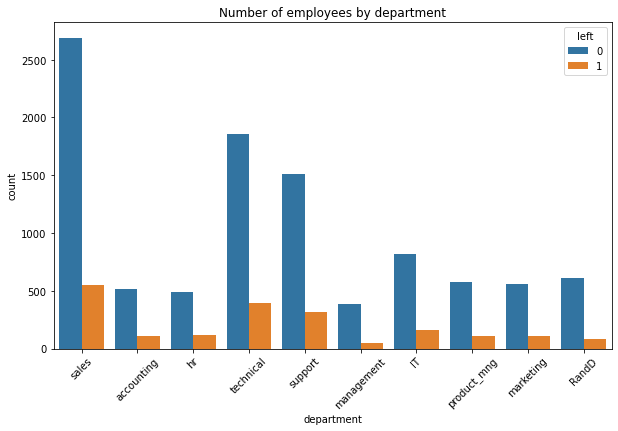

In [17]:
# Is there a department where all most of the employees left?
plt.figure(figsize = (10,6))
sns.countplot(x = df1["department"], hue = df1["left"])
plt.title("Number of employees by department")
plt.xticks(rotation = 45)
plt.show()

There doesn't seem to be a mass leaving by department, which suggests the company didn't recently close any departments nor was there a mass firing of a specific department. It seems that around the same proportion of employees from each department left, so department is probably not a good predictor of whether employees will leave.

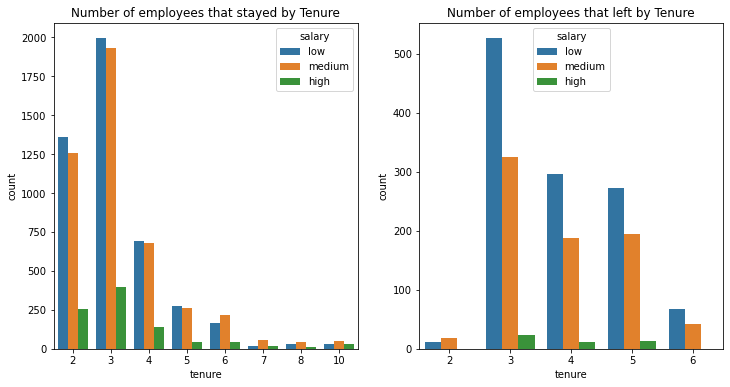

In [99]:
# Tenure vs salary
fig, ax = plt.subplots(1,2, figsize = (12,6))
sns.countplot(x = stayed["tenure"], hue = stayed["salary"], ax = ax[0])
ax[0].set_title("Number of employees that stayed by Tenure")
sns.countplot(x = left["tenure"], hue = left["salary"], ax = ax[1])
ax[1].set_title("Number of employees that left by Tenure")
plt.show()

Employees who stayed longer were not disproportionally high salaried. There are no employees who left having a tenure of more than 6 years. Salary does not seem to have a large effect on whether employees choose to leave.

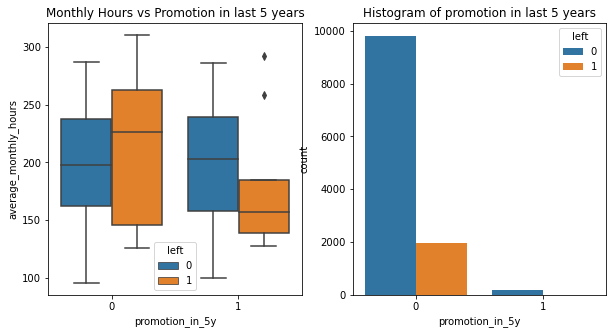

In [19]:
# Promotion vs number of hours
fig, ax = plt.subplots(1,2, figsize = (10,5))
sns.boxplot(x = df1["promotion_in_5y"], y = df1["average_monthly_hours"], hue = df1["left"], ax = ax[0])
ax[0].set_title("Monthly Hours vs Promotion in last 5 years")

sns.countplot(x = df1["promotion_in_5y"], hue = df1["left"], ax = ax[1])
ax[1].set_title("Histogram of promotion in last 5 years")
plt.show()

Almost no employees who were promoted left. Out of those that were promoted and left, they were working less hours than the mean. Those who weren't promoted and left worked more than the average. There are very few observations for employees who were promoted and left, so it's unclear as to whether this is a good predictor of whether an employee will leave.

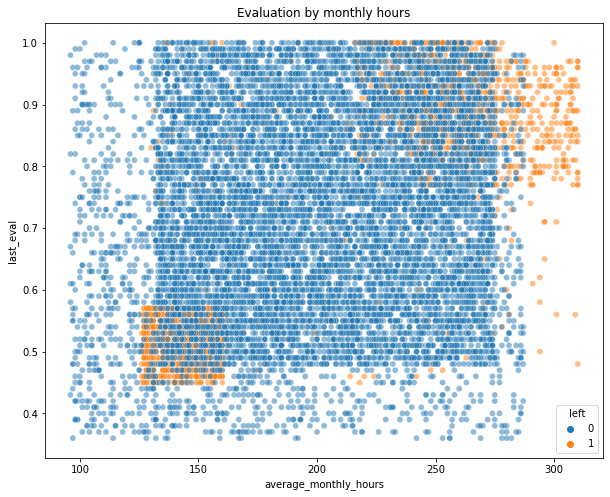

In [20]:
# Evaluation  vs monthly hours
plt.figure(figsize = (10,8))
sns.scatterplot(x = df1["average_monthly_hours"], y = df1["last_eval"], hue = df1["left"], alpha = 0.5)
plt.title("Evaluation by monthly hours")
plt.show()

Surprisingly, a number of people who worked a lot of hours still received relatively bad evaluation scores and likewise a lot of people who didn't work as much received high evaluation scores.

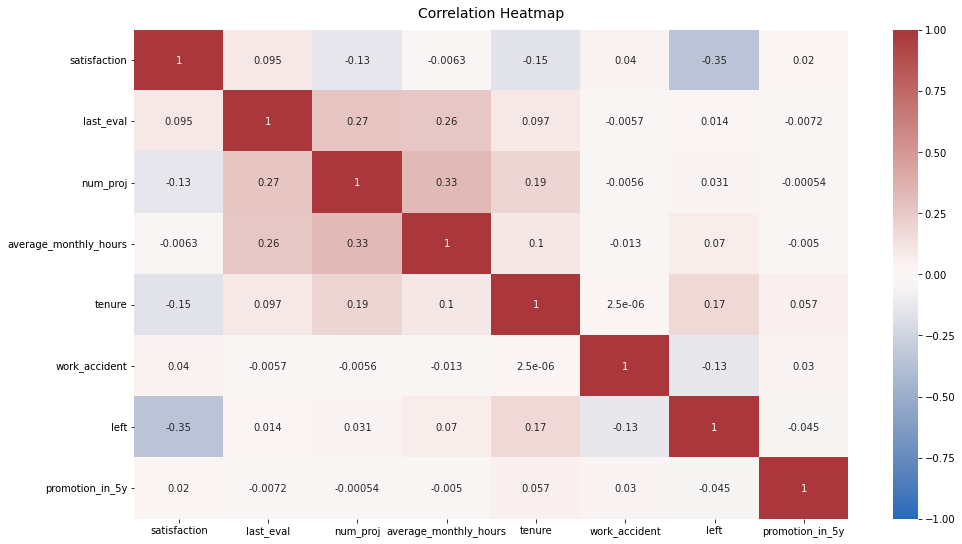

In [21]:
# Heatmap showing correlations
plt.figure(figsize=(16, 9))
heatmap = sns.heatmap(df1.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

### Insights

It seems that the people who are most likely to leave are those working long hours for many projects. Those with lower satisfaction rates are also more likely to leave.

## Step 3. Model Building and Evaluation

Prediction task: Binary classification:
- My goal is to predict whether an employee will leave the company which is a categorical binary variable.

Types of Binary classification models:
- Logistic Regression
- Decision Tree
- Random Forest

Will do all three and choose best.

Plan Overview:
- Test assumptions of model as necessary.
- Train all models on the same training data using the variables of interest below.
    - if testing different hyperparameters:
        - use cross validation within the training data.
        - choose model with hyperparameters that maximize f1 score.
- Compare performance for the three models on the separate validation set and choose best model.
- Retrain best model on training and validation sets.
- Test performance of best model on testing set.

Variables of Interest:
 - satisfaction (likely positively correlated with leaving)
 - last_eval (likely negatively correlated with leaving since those with poor reviews are more likely to get fired)
 - num_proj (employees who work few projects or too many projects are likely to leave)
 - average_monthly_hours (employees with too few hours are likely fired, too many hours are likely to leave)
 - tenure (likely negatively correlated with leaving)
 - salary (low salaries for long tenure likely correlated with leaving)

### Modeling Logistic Regression



#### Test Assumptions:
- Outcome variable is categorical: 
    - already True
- Observations are independent of each other: 
    - must assume but not necessarily the case
    - employees could influence each other's decision to stay or leave (mass quitting)
    - employer could choose to fire an entire department (mass firing)
- No severe multicollinearity among X variables:
    - need to test
- No extreme outliers
    - need to test
- Linear relationship between each X variable and the logit of the outcome variable
    - need to test
- Sufficiently large sample size
    - already True

In [22]:
# Logistic Regression models can't handle outliers, so remove outliers for tenure
log_reg_df = df1[(df1["tenure"]< tenure_q3 + 1.5 * tenure_iqr) & (df1["tenure"]> tenure_q1 - 1.5 * tenure_iqr)]

In [23]:
# All features of interest must be numeric so must convert all categorical features

# Salary is hierarchical (ordinal feature)
log_reg_df['salary'] = (
    log_reg_df['salary'].astype('category')
    .cat.set_categories(['low', 'medium', 'high'])
    .cat.codes)

# Department is categorical but not relevant based on visualization in section above.
# It will not be included in the model.


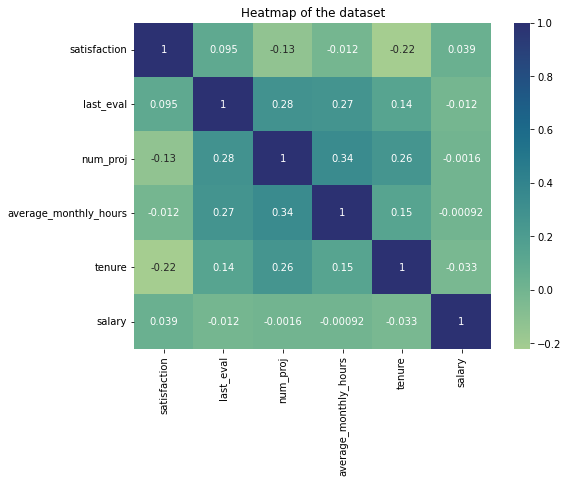

In [24]:
# Features can't have severe multicollinearity
plt.figure(figsize=(8, 6))
sns.heatmap(log_reg_df[["satisfaction", "last_eval", "num_proj", "average_monthly_hours", "tenure", "salary"]]
            .corr(), annot=True, cmap="crest")
plt.title('Heatmap of the dataset')
plt.show()

None of the features of interest are too highly correlated with each other, so this assumption is met.

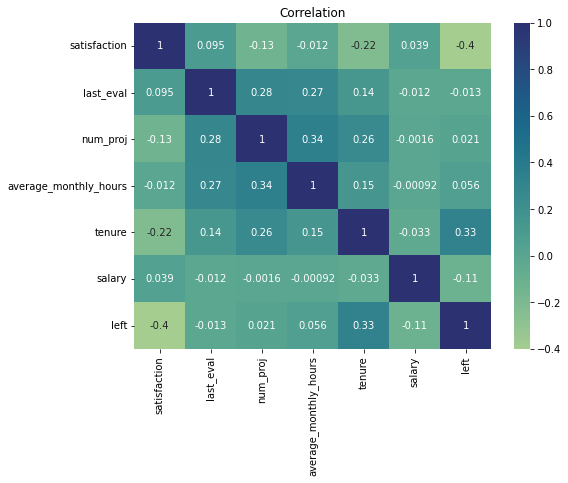

In [25]:
# Features must be correlated/anticorrelated with outcome variable
plt.figure(figsize=(8, 6))
sns.heatmap(log_reg_df[["satisfaction", "last_eval", "num_proj", "average_monthly_hours", "tenure", "salary", "left"]]
            .corr(), annot=True, cmap="crest")
plt.title('Correlation')
plt.show()

Satisfaction and tenure are most correlated with whether an employee left, but will model with all features of interest even though some are not very correlated.

#### Construct Logistic Regression Model: 

In [26]:
# Separate Features and Outcome variables
X = log_reg_df[["satisfaction", "last_eval", "num_proj", "average_monthly_hours", "tenure", "salary"]]
y = log_reg_df["left"]

In [27]:
# Split training, validation, and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify = y, random_state = 42)
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size = 0.25, stratify = y_train, random_state = 42)

In [28]:
# Fit logistic regression model to training data
log_clf = LogisticRegression(random_state = 42, max_iter = 500).fit(X_tr, y_tr)

In [29]:
# Predict results of validation data
y_pred = log_clf.predict(X_val)

#### Evaluate Logistic Regression Model

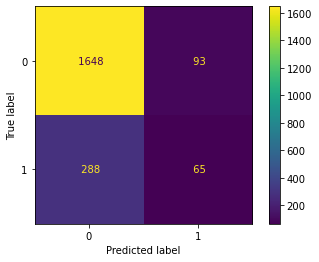

In [30]:
# Confusion Matrix for validation data
cm_log_reg = confusion_matrix(y_val, y_pred, labels = log_clf.classes_)
disp_log_reg = ConfusionMatrixDisplay(confusion_matrix = cm_log_reg, display_labels = log_clf.classes_)
disp_log_reg.plot(values_format = " ")
plt.show()

In [31]:
#Checking class imbalance
log_reg_df["left"].value_counts(normalize = True)

0    0.831468
1    0.168532
Name: left, dtype: float64

There is some class imbalance (83% - 17% split), but not enough to consider resampling.

In [32]:
# Results of logistic regression model
results = pd.DataFrame({'model': ["Logistic Regression"],
                        'precision': [round(precision_score(y_val, y_pred),4)],
                        'recall': [round(recall_score(y_val, y_pred),4)],
                        'F1': [round(f1_score(y_val, y_pred),4)],
                        'accuracy': [round(accuracy_score(y_val, y_pred),4)],
                        },
                       )
results

,model,precision,recall,F1,accuracy
0,Logistic Regression,0.4114,0.1841,0.2544,0.8181


Even though the accuracy is around 82%, the model performed relatively poorly. Precision is 41%, recall is 18%, and f1 score is 25%  when true positive is accurately predicting leaving.

In [33]:
# Check results depending on which outcome value is considered positive
target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_val, y_pred, target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.85      0.95      0.90      1741
    Predicted would leave       0.41      0.18      0.25       353

                 accuracy                           0.82      2094
                macro avg       0.63      0.57      0.58      2094
             weighted avg       0.78      0.82      0.79      2094



When testing the precision, recall, and f1 of whether an employee stayed, the scores are much higher, with a precision of 85%, and recall of 95% and an f1-score of 90%. Overall, the weighted average values are precision 78%, recall 82%, and f1-score 79%.

However, since the purpose is to predict whether an employee will leave, the following results are most relevant for model comparison:

In [34]:
results

,model,precision,recall,F1,accuracy
0,Logistic Regression,0.4114,0.1841,0.2544,0.8181


### Modeling Decision Tree

#### Assumptions:
- Decision trees can handle outliers (so won't remove outliers in tenure)
- Features are independent (already tested for Logistic Regression above)

#### Construct Decision Tree Model

In [35]:
# Salary is hierarchical (ordinal feature) - convert to numeric
df1['salary'] = (
    df1['salary'].astype('category')
    .cat.set_categories(['low', 'medium', 'high'])
    .cat.codes)

In [36]:
# Separate Features and Outcome variables
X = df1[["satisfaction", "last_eval", "num_proj", "average_monthly_hours", "tenure", "salary"]]
y = df1["left"]

In [37]:
# Split training, validation, and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify = y, random_state = 42)
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size = 0.25, stratify = y_train, random_state = 42)

In [38]:
# Get best hyperparameters by cross-validation using GridSearch on just training set
tree = DecisionTreeClassifier(random_state = 42)

tree_params = {'max_depth':[2, 4, 6, 8, None],
             'min_samples_leaf': [1, 2, 3, 4, 5],
             'min_samples_split': [2, 4, 6]
             }
scoring = {"accuracy", "precision", "recall", "f1"}

tree1 = GridSearchCV(tree, tree_params, scoring = scoring, cv = 4, refit = "f1")

In [39]:
%%time

# train Decision Tree model with different sets of params
tree1.fit(X_tr, y_tr)

CPU times: user 3.76 s, sys: 0 ns, total: 3.76 s
Wall time: 3.76 s


GridSearchCV(cv=4, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=42,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [2, 4, 6, 8, None],
                      

In [40]:
# Get best hyperparameters
tree1.best_params_

{'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 2}

In [41]:
print("F1 score of best tree model: ")
tree1.best_score_

F1 score of best tree model: 


0.9382031371307683

The best tree model got an f1 score of 93.8%.

In [42]:
%%time

# Fit just best tree model
tree = DecisionTreeClassifier(max_depth = 8, min_samples_leaf = 2, min_samples_split = 2, random_state = 42).fit(X_tr, y_tr)

CPU times: user 15 ms, sys: 0 ns, total: 15 ms
Wall time: 14.2 ms


In [43]:
# Get y values for validation set
y_pred = tree.predict(X_val)


#### Evaluate Decision Tree Model

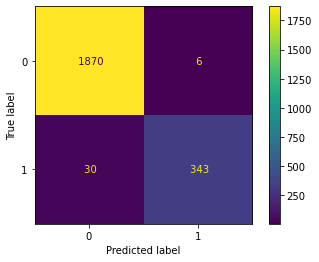

In [44]:
# Confusion Matrix for validation data
cm_tree = confusion_matrix(y_val, y_pred, labels = tree.classes_)
disp_tree = ConfusionMatrixDisplay(confusion_matrix = cm_tree, display_labels = tree.classes_)
disp_tree.plot(values_format = " ")
plt.show()

In [45]:
tree_results = pd.DataFrame({'model': ["Decision Tree"],
                        'precision': [round(precision_score(y_val, y_pred),4)],
                        'recall': [round(recall_score(y_val, y_pred),4)],
                        'F1': [round(f1_score(y_val, y_pred),4)],
                        'accuracy': [round(accuracy_score(y_val, y_pred),4)],
                        },
                       )
tree_results

,model,precision,recall,F1,accuracy
0,Decision Tree,0.9828,0.9196,0.9501,0.984


In [47]:
# Check results depending on which outcome value is considered positive
target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_val, y_pred, target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.98      1.00      0.99      1876
    Predicted would leave       0.98      0.92      0.95       373

                 accuracy                           0.98      2249
                macro avg       0.98      0.96      0.97      2249
             weighted avg       0.98      0.98      0.98      2249



In this case, there is a much smaller difference in the metrics between when the positive value is leaving vs when the positive value is staying. However, it's still worth focusing on predicting leaving since this is the value the company wants predict so they can determine how to reduce it. 

In [46]:
results = pd.concat([results, tree_results], axis=0)
results

,model,precision,recall,F1,accuracy
0,Logistic Regression,0.4114,0.1841,0.2544,0.8181
0,Decision Tree,0.9828,0.9196,0.9501,0.9840


The decision tree model performed very well with a precision of 98%, and recall of 92%, an f1 score of 95% and an accuracy of 98%. Although decision trees tend to overfit the data, this shouldn't be the case here, since the validation set is separate from the data used for selecting the hyperparameters (Hyperparameters were chosen through cross validation in the training data). Regardless, the next model is random forest which is less likely to overfit.

#### What are the most predictive features?

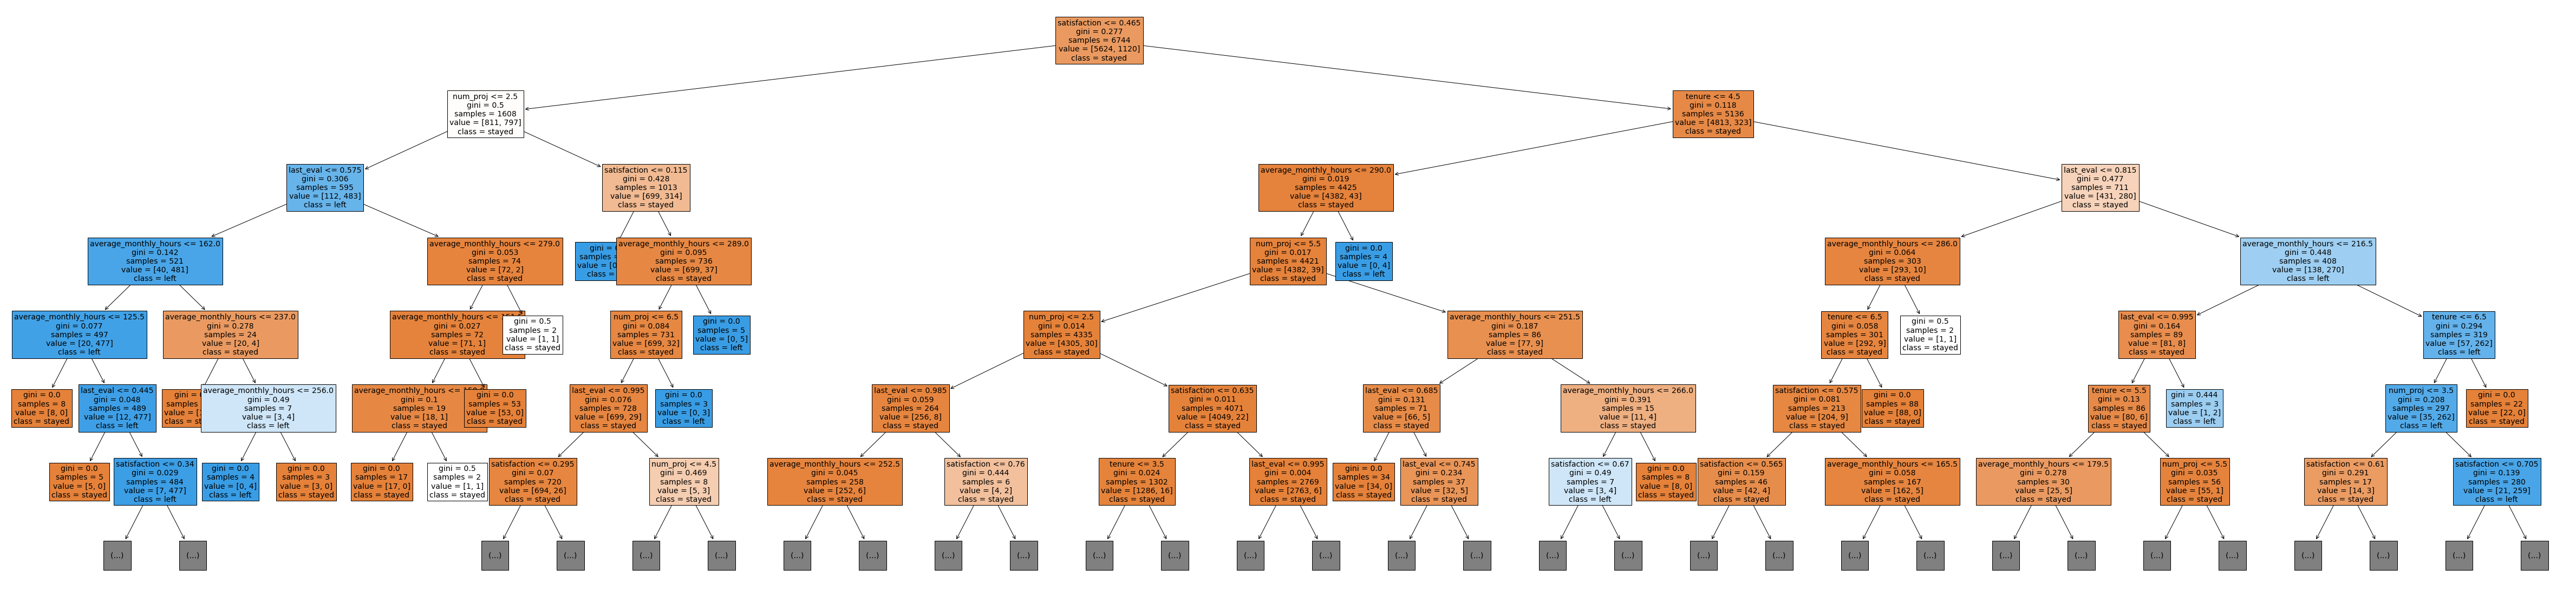

In [82]:
#Plot tree
plt.figure(figsize=(85,20))
plot_tree(tree, max_depth=6, fontsize=14, feature_names=X.columns, 
          class_names={0:'stayed', 1:'left'}, filled=True);
plt.show()

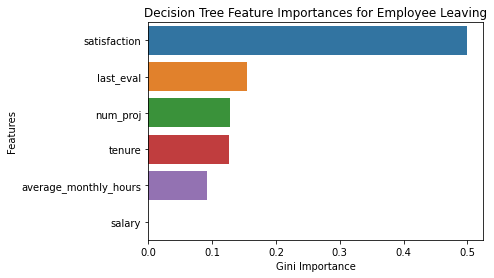

In [95]:
# Plot importance
tree_importances = pd.DataFrame(tree.feature_importances_, columns = ["gini_importance"], index = X.columns)

# Sort features by gini importance
tree_importances = tree_importances.sort_values("gini_importance", ascending = False)

sns.barplot(data = tree_importances, x = "gini_importance", y = tree_importances.index, orient = "h")
plt.title("Decision Tree Feature Importances for Employee Leaving")
plt.xlabel("Gini Importance")
plt.ylabel("Features")
plt.show()

Based on the top nodes on the tree and the feature importance bar graph, the most influencial features on `left` are `satisfaction`, followed by `last_eval`, `num_proj`, `tenure`, and `average_monthly_hours`. `Salary` does not seem to predict whether employees leave.

### Modeling Random Forest

#### Variables of Interest
The variables of interest are the same as the models above:

- satisfaction (likely positively correlated with leaving)
- last_eval (likely negatively correlated with leaving since those with poor reviews are more likely to get fired)
- num_proj (employees who work few projects or too many projects are likely to leave)
- average_monthly_hours (employees with too few hours are likely fired, too many hours are likely to leave)
- tenure (likely negatively correlated with leaving)
- salary (low salaries for long tenure likely correlated with leaving)

#### Construct Model

Note: Data is the same as forest plot since it uses the same assumptions.

In [48]:
# Get best hyperparameters by cross-validation using GridSearch on just training set
random_forest = RandomForestClassifier(random_state = 42)

forest_params = {'max_depth': [3,5, None], 
             'max_features': [0.5, 1.0],
             'max_samples': [0.7],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }

scoring = {"accuracy", "precision", "recall", "f1"}

random_forest1 = GridSearchCV(random_forest, forest_params, scoring = scoring, cv = 4, refit = "f1")

In [49]:
%%time

# train Random Forest model with different sets of params
random_forest1.fit(X_tr, y_tr)

CPU times: user 10min 53s, sys: 1.81 s, total: 10min 55s
Wall time: 10min 55s


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                  

##### Store Model

In [50]:
# Path to folder
path = '/home/jovyan/work/'

In [51]:
# functions to write and read model
def write_pickle(path, model_object, save_as:str):
    '''
    In: 
        path:         path of folder where you want to save the pickle
        model_object: a model you want to pickle
        save_as:      filename for how you want to save the model

    Out: A call to pickle the model in the folder indicated
    '''    

    with open(path + save_as + '.pickle', 'wb') as to_write:
        pickle.dump(model_object, to_write)
        
def read_pickle(path, saved_model_name:str):
    '''
    In: 
        path:             path to folder where you want to read from
        saved_model_name: filename of pickled model you want to read in

    Out: 
        model: the pickled model 
    '''
    with open(path + saved_model_name + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)

    return model

In [52]:
# write pickle
write_pickle(path, random_forest1, "Random_Forest")

In [53]:
random_forest1 = read_pickle(path, "Random_Forest")

In [54]:
# Get best hyperparameters
random_forest1.best_params_

{'max_depth': None,
 'max_features': 0.5,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 500}

In [55]:
print("F1 score of best random forest model: ")
random_forest1.best_score_

F1 score of best random forest model: 


0.944994728243679

The best random forest model got an F1 score of 94.5%

In [56]:
%%time

# Fit just best random forest model
best_random_forest = RandomForestClassifier(max_depth = None, max_features = 0.5, max_samples = 0.7, min_samples_leaf = 1, min_samples_split = 3, n_estimators = 500, random_state = 42).fit(X_tr, y_tr)

CPU times: user 2.49 s, sys: 11.9 ms, total: 2.5 s
Wall time: 2.5 s


In [57]:
# Get y values for validation set
y_pred = best_random_forest.predict(X_val)

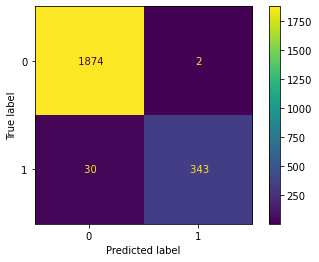

In [58]:
# Confusion Matrix for validation data
cm_random_forest = confusion_matrix(y_val, y_pred, labels = best_random_forest.classes_)
disp_random_forest = ConfusionMatrixDisplay(confusion_matrix = cm_random_forest, display_labels = best_random_forest.classes_)
disp_random_forest.plot(values_format = " ")
plt.show()

In [59]:
forest_results = pd.DataFrame({'model': ["Random Forest"],
                        'precision': [round(precision_score(y_val, y_pred),4)],
                        'recall': [round(recall_score(y_val, y_pred),4)],
                        'F1': [round(f1_score(y_val, y_pred),4)],
                        'accuracy': [round(accuracy_score(y_val, y_pred),4)],
                        },
                       )
forest_results

,model,precision,recall,F1,accuracy
0,Random Forest,0.9942,0.9196,0.9554,0.9858


In [60]:
# Check results depending on which outcome value is considered positive
target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_val, y_pred, target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.98      1.00      0.99      1876
    Predicted would leave       0.99      0.92      0.96       373

                 accuracy                           0.99      2249
                macro avg       0.99      0.96      0.97      2249
             weighted avg       0.99      0.99      0.99      2249



Once again, there is a much smaller difference in the metrics between when the positive value is leaving vs when the positive value is staying than in the Logistic Regression Model. However, it's still worth focusing on predicting leaving since this is the value the company wants predict so they can determine how to reduce it.

In [67]:
results = pd.concat([results, forest_results], axis=0).reset_index(drop = True)
results

,model,precision,recall,F1,accuracy
0,Logistic Regression,0.4114,0.1841,0.2544,0.8181
1,Decision Tree,0.9828,0.9196,0.9501,0.9840
2,Random Forest,0.9942,0.9196,0.9554,0.9858


The random forest model performed very well with a precision of 99.4%, a recall of 92.0%, an f1 score of 95.5% and an accuracy of 98.6%. This is an improvement from the decision tree model, specifically in precision, f1, and accuracy. Overall, this seems to be the best model.

### Best Model: Random Forest

In [68]:
results

,model,precision,recall,F1,accuracy
0,Logistic Regression,0.4114,0.1841,0.2544,0.8181
1,Decision Tree,0.9828,0.9196,0.9501,0.9840
2,Random Forest,0.9942,0.9196,0.9554,0.9858


The best model in every metric is the Random Forest Model with a precision of 99.4%, a recall of 92.0%, an f1 score of 95.5% and an accuracy of 98.6%. Thus, the next step is to retrain the model on all training and validation data, and then test it on the test data.

#### Retrain model on training + validation data

Note: X_train = X_tr + X_val, y_train = y_tr + y_val

In [69]:
%%time

# Fit just best model on training and validation data
best_model = RandomForestClassifier(max_depth = None, max_features = 0.5, max_samples = 0.7, min_samples_leaf = 1, min_samples_split = 3, n_estimators = 500, random_state = 42).fit(X_train, y_train)


CPU times: user 3.05 s, sys: 16.1 ms, total: 3.07 s
Wall time: 3.07 s


In [70]:
# Get predictions for testing data
y_pred = best_model.predict(X_test)

#### Evaluate Model

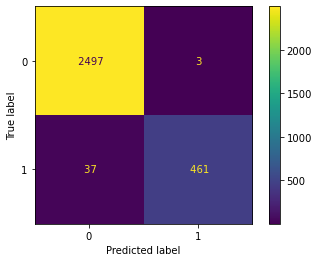

In [71]:
# Confusion Matrix for testing data
cm_best_model = confusion_matrix(y_test, y_pred, labels = best_model.classes_)
disp_best_model = ConfusionMatrixDisplay(confusion_matrix = cm_best_model, display_labels = best_model.classes_)
disp_best_model.plot(values_format = " ")
plt.show()

In [74]:
best_model_results_test = pd.DataFrame({'model': ["Random Forest Test"],
                        'precision': [round(precision_score(y_test, y_pred),4)],
                        'recall': [round(recall_score(y_test, y_pred),4)],
                        'F1': [round(f1_score(y_test, y_pred),4)],
                        'accuracy': [round(accuracy_score(y_test, y_pred),4)],
                        },
                       )
best_model_results_test

,model,precision,recall,F1,accuracy
0,Random Forest Test,0.9935,0.9257,0.9584,0.9867


In [77]:
# Check results depending on which outcome value is considered positive
target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_test, y_pred, target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.99      1.00      0.99      2500
    Predicted would leave       0.99      0.93      0.96       498

                 accuracy                           0.99      2998
                macro avg       0.99      0.96      0.98      2998
             weighted avg       0.99      0.99      0.99      2998



In [75]:
y_train_pred = best_model.predict(X_train)

best_model_results_train = pd.DataFrame({'model': ["Random Forest Train"],
                        'precision': [round(precision_score(y_train, y_train_pred),4)],
                        'recall': [round(recall_score(y_train, y_train_pred),4)],
                        'F1': [round(f1_score(y_train, y_train_pred),4)],
                        'accuracy': [round(accuracy_score(y_train, y_train_pred),4)],
                        },
                       )
best_model_results_train

,model,precision,recall,F1,accuracy
0,Random Forest Train,0.9922,0.9424,0.9667,0.9892


In [76]:
best_model_results = pd.concat([best_model_results_train, best_model_results_test], axis=0).reset_index(drop = True)
best_model_results

,model,precision,recall,F1,accuracy
0,Random Forest Train,0.9922,0.9424,0.9667,0.9892
1,Random Forest Test,0.9935,0.9257,0.9584,0.9867


On testing data, the random forest model performed very well with a precision of 99.4%, a recall of 92.6%, an f1 score of 95.8%, and an accuracy of 98.7%. Additionally the model performs only very slightly worse for recall, f1 and accuracy in testing data than in training data, which suggests that the model didn't overfit the training data and it's performance is representative of how it will perform on new, unseen data.

Interpreting the precision and recall, we can see that if the model predicts that an employee will leave, there is a 99.4% chance that they will leave. Additionally, if an employee leaves, there is a 92.6% chance the model predicted they would leave. Overall, this suggest the model could be useful in determining which employees to focus on to improve retention.

#### What are the most predictive features?

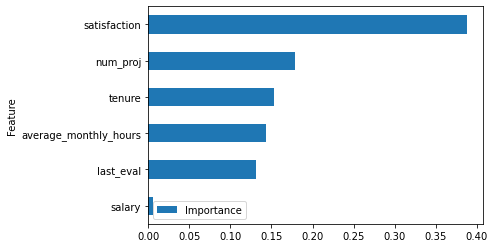

In [80]:
feature_importance = best_model.feature_importances_

features_w_importance = pd.DataFrame({"Feature": X.columns, "Importance": feature_importance}).sort_values("Importance")

features_w_importance.plot(kind = "barh", x = "Feature", y = "Importance")

plt.title("Random Forest Feature Importances for Employee Leaving")
plt.show()

The plot above shows that in this random forest model, `satisfaction` has the highest importance in predicting `left`, followed by `num_proj`, `tenure`, `average_monthly_hours`, and `last_eval`. `Salary` does not seem very important in predicting the outcome variable `left`.

## Step 4: Summary of model results

### Logistic Regression
The logistic regression model achieved a precision of 41.1%, a recall is 18.4%, f1 score of 25.4%  and an accuracy of 81.8% on a held out set.

### Decision Tree
The decision tree model achieved a precision of 98.3%, a recall of 92.0%, an f1 score of 95.0%, and an accuracy of 98.4% on a held out set.

### Random Forest
The random forest model achieved a precision of 99.4%, a recall of 92.6%, an f1 score of 95.8%, and an accuracy of 98.7%

### Best Model
The random forest model modestly outperformed the decision tree model, and greatly outperformed the logistic regression model.

### Conclusion, Recommendations, Next Steps

The models and feature importances showed that employees that leave are generally less satisfied, and many are overworked. 

To help retain employees, leadership could:
 - reward employees more for working longer hours or don't require them to do so.
     - make overtime policy and expected workload and time off policy clear
     - ensure evaluations aren't reinforcing needing to work over 200 hours a month to get a good score.
 - cap the number of projects that employees can work on
 - hold events to improve company culture so as to improve employee satisfaction
 
With care for ethical considerations, leadership could also ask employees who the model predicts will leave what leadership can do to make their experience at the company better.

Additionally, it might be worth creating new models that don't take into account satisfaction and number of hours employees work per month, as these values may not be available for all employees.

 

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.